# Marketing Data for Retail Analytics

### Firstly, I am loading in the necesary libraries for this project 

In [3]:
# Reading in the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

In [5]:
# Define column names
column_names = ["Cust_ID", "Cust_Gender", "Cust_Age","Prdct_ID","Prdct_Category","Prdct_Amt","Trnst_ID","Trnst_Date","Prch_Qnty"]

# Reading in the csv file
marketing_df = pd.read_csv('Marketing_data.csv', names=column_names, header = None)

In [6]:
# Checking info the dimensions of df
marketing_df.shape

(806, 9)

In [7]:
# printing the basic structure of the dataframe
print(marketing_df.info())
print(marketing_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cust_ID         806 non-null    object 
 1   Cust_Gender     806 non-null    object 
 2   Cust_Age        806 non-null    int64  
 3   Prdct_ID        806 non-null    int64  
 4   Prdct_Category  806 non-null    object 
 5   Prdct_Amt       806 non-null    float64
 6   Trnst_ID        806 non-null    int64  
 7   Trnst_Date      806 non-null    object 
 8   Prch_Qnty       806 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 56.8+ KB
None
      Cust_ID Cust_Gender  Cust_Age  Prdct_ID Prdct_Category  Prdct_Amt  \
0  CUST001              M        34      2551             Be       50.0   
1  CUST010              F        52      3671             Cl       50.0   
2  CUST100              M        41      2226             El       30.0   
3  CUST101              M        

In [8]:
# Checking the unique values in the columns
print(marketing_df.nunique())

Cust_ID           806
Cust_Gender         2
Cust_Age           47
Prdct_ID          806
Prdct_Category      3
Prdct_Amt           5
Trnst_ID          806
Trnst_Date        327
Prch_Qnty           4
dtype: int64


In [9]:
# Checking for missing
print(marketing_df.isnull().sum())

Cust_ID           0
Cust_Gender       0
Cust_Age          0
Prdct_ID          0
Prdct_Category    0
Prdct_Amt         0
Trnst_ID          0
Trnst_Date        0
Prch_Qnty         0
dtype: int64


In [10]:
# Changing the datatype of date
marketing_df['Trnst_Date'] = pd.to_datetime(marketing_df['Trnst_Date'])

In [11]:
# First set the datetime column as index
marketing_df = marketing_df.set_index('Trnst_Date', drop = False)

In [12]:
# Defining the latest transaction date as the snapshot date
snapshot_date = marketing_df['Trnst_Date'].max() + pd.Timedelta(days=1)

### Basic Statistics

In [14]:
# Statistical summary
marketing_df.describe()

,Cust_Age,Prdct_ID,Prdct_Amt,Trnst_ID,Trnst_Date,Prch_Qnty
count,806.000000,806.000000,806.000000,806.000000,806,806.000000
mean,41.397022,4265.756824,181.122829,500.132754,2023-07-03 17:28:44.069478912,2.516129
min,18.000000,1501.000000,25.000000,1.000000,2023-01-01 00:00:00,1.000000
25%,29.000000,2900.250000,30.000000,247.250000,2023-04-04 00:00:00,1.000000
50%,42.000000,4242.500000,50.000000,491.500000,2023-07-01 00:00:00,3.000000
75%,53.000000,5719.500000,300.000000,746.750000,2023-10-05 18:00:00,4.000000
max,64.000000,6999.000000,500.000000,999.000000,2024-01-01 00:00:00,4.000000
std,13.647422,1604.518890,189.948371,289.217185,NaN,1.132957


In [15]:
# Creating the total spent column
marketing_df['DEPVAR'] = marketing_df['Prch_Qnty'] * marketing_df['Prdct_Amt']

print(marketing_df.head())


               Cust_ID Cust_Gender  Cust_Age  Prdct_ID Prdct_Category  \
Trnst_Date                                                              
2023-11-24  CUST001              M        34      2551             Be   
2023-10-07  CUST010              F        52      3671             Cl   
2023-06-16  CUST100              M        41      2226             El   
2023-01-29  CUST101              M        32      4424             Cl   
2023-04-28  CUST102              F        47      3815             Be   

            Prdct_Amt  Trnst_ID Trnst_Date  Prch_Qnty  DEPVAR  
Trnst_Date                                                     
2023-11-24       50.0         1 2023-11-24          3   150.0  
2023-10-07       50.0        10 2023-10-07          4   200.0  
2023-06-16       30.0       100 2023-06-16          1    30.0  
2023-01-29      300.0       101 2023-01-29          2   600.0  
2023-04-28       25.0       102 2023-04-28          2    50.0  


In [16]:
# Creating Age Group from Customer Age
marketing_df['Age_Group'] = pd.cut(marketing_df['Cust_Age'], 
                                 bins=[0, 25, 35, 45, 55, 100],
                                 labels=['Under 25', '26-35', '36-45', '46-55', 'Over 55'])
print(marketing_df.head())

               Cust_ID Cust_Gender  Cust_Age  Prdct_ID Prdct_Category  \
Trnst_Date                                                              
2023-11-24  CUST001              M        34      2551             Be   
2023-10-07  CUST010              F        52      3671             Cl   
2023-06-16  CUST100              M        41      2226             El   
2023-01-29  CUST101              M        32      4424             Cl   
2023-04-28  CUST102              F        47      3815             Be   

            Prdct_Amt  Trnst_ID Trnst_Date  Prch_Qnty  DEPVAR Age_Group  
Trnst_Date                                                               
2023-11-24       50.0         1 2023-11-24          3   150.0     26-35  
2023-10-07       50.0        10 2023-10-07          4   200.0     46-55  
2023-06-16       30.0       100 2023-06-16          1    30.0     36-45  
2023-01-29      300.0       101 2023-01-29          2   600.0     26-35  
2023-04-28       25.0       102 2023-04-28  

In [17]:
# Checking the revenue generation trend
total_revenue = marketing_df['DEPVAR'].sum()
avg_rev_per_cust = marketing_df.groupby('Cust_ID')['DEPVAR'].sum().mean()
max_rev_prdct = marketing_df.groupby('Prdct_ID')['DEPVAR'].sum().idxmax()

print(f"Total DEPVAR: ${total_revenue:,.2f}")
print(f"Average DEPVAR Per Customer: ${avg_rev_per_cust:,.2f}")
print(f"Best-Selling Product by DEPVAR: {max_rev_prdct}")


Total DEPVAR: $367,515.00
Average DEPVAR Per Customer: $455.97
Best-Selling Product by DEPVAR: 1625


In [18]:
# Checking for average purchase per customers
avg_purchase = marketing_df.groupby("Cust_ID")["Prch_Qnty"].sum().mean()
print(f"Average purchase quantity per customer: {avg_purchase:.2f}")


Average purchase quantity per customer: 2.52


In [19]:
# Checking the Correlation between purchase quantity and total revenue
marketing_df[['Prch_Qnty', 'DEPVAR']].corr()


,Prch_Qnty,DEPVAR
Prch_Qnty,1.00000,0.36358
DEPVAR,0.36358,1.00000


In [20]:
# Total quantity sold per product
product_sales = marketing_df.groupby('Prdct_ID').agg({'Prch_Qnty': sum}).reset_index()
product_sales = product_sales.sort_values(by='Prch_Qnty', ascending=False)

print(product_sales.head(10))  # Top 10 best-selling products

     Prdct_ID  Prch_Qnty
804      6997          4
0        1501          4
1        1502          4
2        1508          4
767      6735          4
768      6755          4
769      6762          4
771      6770          4
756      6648          4
762      6709          4


/tmp/ipykernel_1595/644114558.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  product_sales = marketing_df.groupby('Prdct_ID').agg({'Prch_Qnty': sum}).reset_index()


In [21]:
# Grouping by Gender to find total purchase quantity
gender_sales = marketing_df.groupby('Cust_Gender')['Prch_Qnty'].sum().reset_index()
gender_sales.columns = ['Cust_Gender', 'Total_Quantity']

# Display results
print(gender_sales)


  Cust_Gender  Total_Quantity
0           F            1060
1           M             968


In [22]:
category_revenue = marketing_df.groupby('Prdct_Category')['DEPVAR'].sum().reset_index()
category_revenue = category_revenue.sort_values(by='DEPVAR', ascending=False)

# Display Top 10 Product Categories by Revenue
print(category_revenue.head(10))


  Prdct_Category    DEPVAR
2             El  128880.0
1             Cl  124575.0
0             Be  114060.0


In [23]:
# Grouping by Age Group, Gender, and Product Category
demographic_category_sales = marketing_df.groupby(['Age_Group', 'Cust_Gender', 'Prdct_Category'])['Prch_Qnty'].sum().reset_index()

# Pivot table for stacked bar chart
pivot_demo = demographic_category_sales.pivot_table(index=['Prdct_Category'], columns=['Age_Group', 'Cust_Gender'], values='Prch_Qnty', aggfunc='sum')

# Display results
print(pivot_demo)


Age_Group      Under 25     26-35     36-45     46-55     Over 55    
Cust_Gender           F   M     F   M     F   M     F   M       F   M
Prdct_Category                                                       
Be                   59  59    74  64    60  58    77  63      58  40
Cl                   41  66    72  86    90  70    85  81      79  63
El                   61  49    91  46    80  53    87  86      46  84


/tmp/ipykernel_1595/1630371223.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demographic_category_sales = marketing_df.groupby(['Age_Group', 'Cust_Gender', 'Prdct_Category'])['Prch_Qnty'].sum().reset_index()


In [24]:
# Group by Age Group and Product Category
age_category_sales = marketing_df.groupby(['Age_Group', 'Prdct_Category'])['Prch_Qnty'].sum().reset_index()

# Pivot table for better visualization
age_category_pivot = age_category_sales.pivot(index='Prdct_Category', columns='Age_Group', values='Prch_Qnty')

# Display results
print(age_category_pivot)

Age_Group       Under 25  26-35  36-45  46-55  Over 55
Prdct_Category                                        
Be                   118    138    118    140       98
Cl                   107    158    160    166      142
El                   110    137    133    173      130


/tmp/ipykernel_1595/794137055.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_sales = marketing_df.groupby(['Age_Group', 'Prdct_Category'])['Prch_Qnty'].sum().reset_index()


In [25]:
# Creating high-value purchased items
marketing_df['High_Value'] = marketing_df['Prdct_Amt'].apply(lambda x: 1 if x > 100 else 0)

In [27]:
marketing_df.groupby(pd.Grouper(key='Trnst_Date', freq='M'))['DEPVAR'].describe()

,count,mean,std,min,25%,50%,75%,max
Trnst_Date,,,,,,,,
2023-01-31,64.0,451.562500,576.623226,25.0,75.00,120.0,675.0,2000.0
2023-02-28,66.0,521.212121,629.758843,25.0,52.50,150.0,1000.0,2000.0
2023-03-31,65.0,397.692308,474.657835,25.0,100.00,150.0,500.0,2000.0
2023-04-30,59.0,391.949153,569.053977,25.0,50.00,100.0,400.0,2000.0
2023-05-31,82.0,503.353659,595.226409,25.0,75.00,150.0,900.0,2000.0
2023-06-30,64.0,503.906250,548.385414,25.0,50.00,200.0,900.0,2000.0
2023-07-31,60.0,520.500000,606.064479,25.0,90.00,200.0,900.0,2000.0
2023-08-31,75.0,413.866667,504.066955,25.0,60.00,150.0,550.0,2000.0
2023-09-30,50.0,355.900000,508.645350,25.0,75.00,135.0,300.0,2000.0


## RFM Analysis

### Recency: Days since the last purchase
### Frequency: Total number of transactions
### Monetary: Total spending amount


In [29]:
# Calculate RFM Metrics
rfm = marketing_df.groupby('Cust_ID').agg({
    'Trnst_Date': lambda x: (snapshot_date - x.max()).days,  # Recency
    'Trnst_ID': 'count',  # Frequency
    'Prdct_Amt': lambda x: (x * marketing_df.loc[x.index, 'Prch_Qnty']).sum()  # Monetary
}).reset_index()

In [30]:
# Renaming the columns
rfm.columns = ['Cust_ID', 'Recency', 'Frequency', 'Monetary']

# Creating RFM Scores (1-5 scale)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1,2,3,4,5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

# Combining scores into RFM Segment
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Displaying the first five customer results
print(rfm.head())

      Cust_ID  Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score
0  CUST001          39          1     400.0       5       1       3       513
1  CUST003         354          1     150.0       1       1       1       111
2  CUST004         226          1    3500.0       2       1       5       215
3  CUST005         241          1     500.0       2       1       3       213
4  CUST010          87          1     500.0       4       1       3       413


## Data Exploratory Analysis

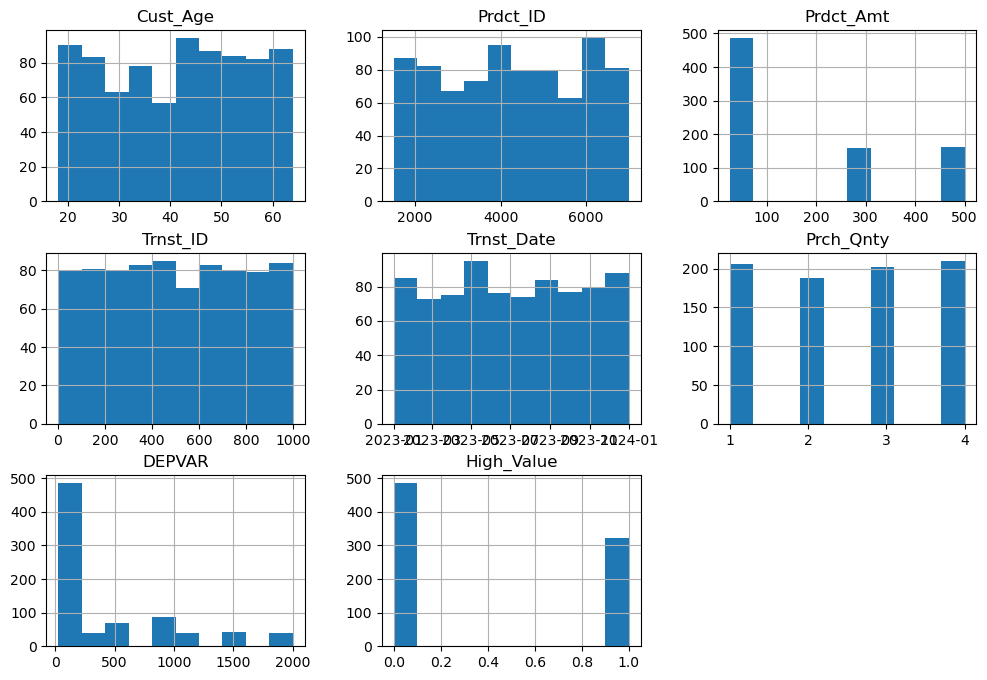

In [32]:
marketing_df.hist(figsize=(12,8))  # Histogram for numerical features
plt.show()

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


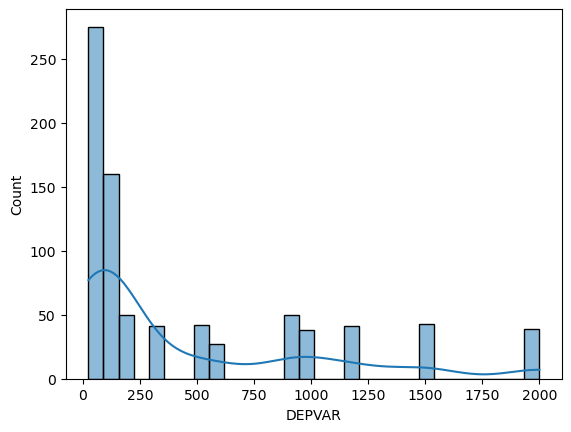

In [33]:
# Plotting the Graph of DepVar
sns.histplot(marketing_df['DEPVAR'], bins=30, kde=True)
plt.show()

In [34]:
#Time Dependency Data
marketing_df.set_index('Trnst_Date', inplace=True)
marketing_df.resample('M').sum().plot()  # Monthly trend
plt.show()

TypeError: category type does not support sum operations

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


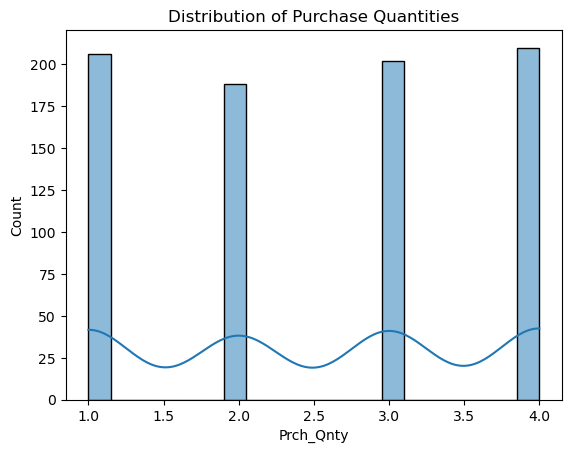

In [50]:
# Distribtion of Purchase Quantity
sns.histplot(marketing_df['Prch_Qnty'], bins=20, kde=True)
plt.title("Distribution of Purchase Quantities")
plt.show()

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


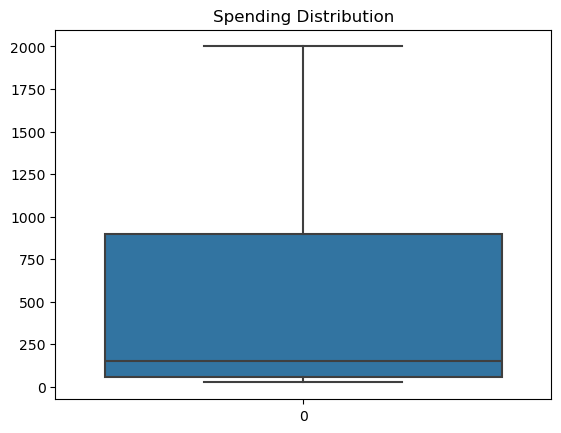

In [52]:
# Distribtion of Purchase Quantity
sns.boxplot(marketing_df['DEPVAR'])
plt.title("Spending Distribution")
plt.show()

In [54]:
# Checking the Monthly Revenue trend
marketing_df['Month'] = marketing_df['Trnst_Date'].dt.to_period("M")
monthly_revenue = marketing_df.groupby('Month')['DEPVAR'].sum()
monthly_revenue.plot(kind='line', figsize=(12,6), marker='o', title="Monthly Spending Trend")
plt.ylabel("Total Spent ($)")
plt.xticks(rotation=45)
plt.show()


KeyError: 'Trnst_Date'

In [ ]:
# Checking the transactions over time
marketing_df.groupby(marketing_df['Trnst_Date'].dt.to_period("M"))['Trnst_ID'].count().plot(kind='line', figsize=(10,5))
plt.title("Transaction Trend Over Time")
plt.ylabel("Number of Transactions")
plt.xlabel("Month")
plt.show()


In [ ]:
# Checking top customers by purchase
marketing_df.groupby('Cust_ID')['Prch_Qnty'].sum().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Customers by Purchase Volume")
plt.ylabel("Total Purchase Quantity")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Checking for top selling products
marketing_df.groupby('Prdct_ID')['Prch_Qnty'].sum().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Products by Sales")
plt.ylabel("Total Units Sold")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Checking for customers that generate the most revenue
top_customers = marketing_df.groupby('Cust_ID')['DEPVAR'].sum().nlargest(10)
top_customers.plot(kind='bar', figsize=(10,5), title="Top 10 Customers by Revenue")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# checking the products that contribute the most to revenue
top_products = marketing_df.groupby('Prdct_ID')['DEPVAR'].sum().nlargest(10)
top_products.plot(kind='bar', figsize=(10,5), title="Top 10 Products by Amount Spent")
plt.ylabel("Total Spent ($)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Checking Customer segmentation by purchase and revenue
marketing_df.groupby('Cust_ID').agg({'DEPVAR': 'sum', 'Prch_Qnty': 'sum'}).plot(
    kind='scatter', x='Prch_Qnty', y='DEPVAR', figsize=(8,5), alpha=0.5
)
plt.title("Customer Purchase Behavior")
plt.xlabel("Total Quantity Purchased")
plt.ylabel("Total Spent")
plt.show()


In [ ]:
# Checking the top selling products 
plt.figure(figsize=(10,5))
sns.barplot(x=product_sales['Prdct_ID'][:10], y=product_sales['Prch_Qnty'][:10], palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Product ID")
plt.ylabel("Total Quantity Sold")
plt.show()


In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=gender_sales['Cust_Gender'], y=gender_sales['Total_Quantity'], palette='coolwarm')
plt.title("Total Purchase Quantity by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Quantity Purchased")
plt.show()


In [ ]:

# Category generating the most revenue
plt.figure(figsize=(10,5))
sns.barplot(x=category_revenue['Prdct_Category'][:10], y=category_revenue['DEPVAR'][:10], palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Revenue-Generating Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue ($)")
plt.show()


In [ ]:
# Plotting the graph for age group and product categories
plt.figure(figsize=(12,6))
sns.heatmap(age_category_pivot, cmap='Blues', annot=True, fmt=".0f")
plt.title("Product Purchases by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Product Category")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Checking the category purchases by and gender, age group
plt.figure(figsize=(14,7))
pivot_demo.plot(kind='bar', stacked=True, figsize=(12,6), colormap='coolwarm')
plt.title("Product Purchases by Age Group & Gender")
plt.xlabel("Product Category")
plt.ylabel("Total Quantity Sold")
plt.legend(title="Age Group & Gender")
plt.xticks(rotation=45)
plt.show()
